# Once we have run the NG transmission disruption scenarios, we analyse the data

### Are scenarios homogenerous within the same group of scenarios?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
results = pd.read_csv('JPoNG_Results.csv')
#results

In [94]:
fields = ["Total-cost", "e-shed-cost", "emission_e", 'ng', 'solar',	'wind',	'hydro', 'nuclear']

DATA = {}
for f in fields:
    DATA[f] = [results[results['dis_scen']=='Scen_0'][f].to_numpy()]

#data = [results[results['dis_scen']=='Scen_0'][field].to_numpy()]
for n in range(1, 16):
    filtered_results = results[results['dis_scen'].str.startswith(f"Trans_scenario__n_{2*n}_")]
    #filtered_results["Total-cost"].to_numpy()
    for f in fields:
        DATA[f].append(filtered_results[f].to_numpy()[:10])

[0.         0.01119949 0.96821299 0.07818962 0.36052514 0.75318373
 2.60623827 1.53239621 3.12885329 1.76612307 4.84970141 6.92751989
 2.67533729 2.02833895 4.5414867  8.38435351]
[0.00000000e+00 5.32264054e+07 4.61850060e+09 3.71777476e+08
 1.71766305e+09 3.59953574e+09 1.25684149e+10 7.35184081e+09
 1.51154435e+10 8.50244849e+09 2.40408983e+10 3.43148147e+10
 1.30760540e+10 9.88216434e+09 2.22674988e+10 4.24522618e+10]
[475238885457.3955, 475257240349.5875, 477012871781.97675, 475481860596.1154, 476433637300.6053, 477909382934.5719, 482243510085.2152, 479761093125.7306, 483098504209.599, 481418799138.0298, 495719143081.912, 495340543839.81415, 488762819756.7643, 487204780507.1837, 490312981099.87256, 506327193623.525]


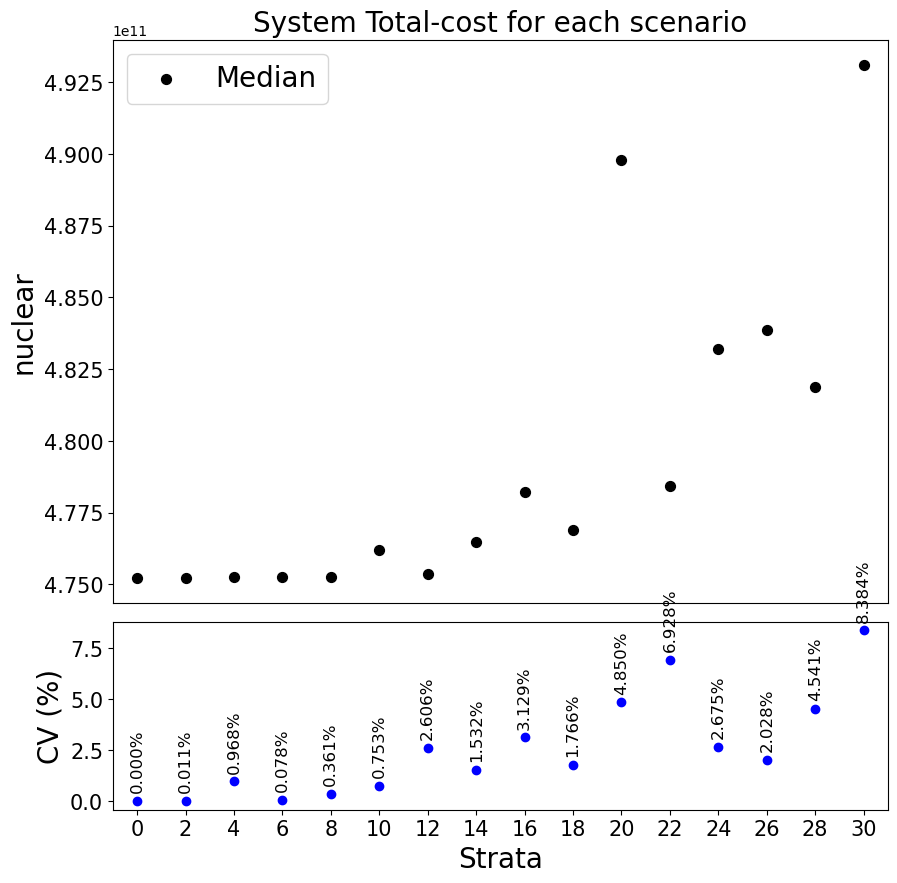

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import variation


violin_plot = False
PLOT_field = "Total-cost"
data = DATA[PLOT_field]

# Assuming `scenario_prob3` contains your data
#data = scenario_prob3  

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])
    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

# Create violin plots
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3, means = [], [], [], []
for _, i in enumerate(data):
    q1, m, q3 = np.percentile(i, [25, 50, 75], axis=0)
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)
    means.append(np.mean(i, axis=0))

whiskers_min = [np.min(i) for i in data]
whiskers_max = [np.max(i) for i in data]

inds = np.arange(1, len(medians) + 1)


if violin_plot:
    # Violin plot in ax1
    parts = ax1.violinplot(data, showmeans=False, showmedians=False, showextrema=False)
    #inds = np.arange(0, len(medians))

    # Scatter plot of medians in ax1
    ax1.scatter(inds, medians, marker='o', color='white', edgecolor='black', s=50, zorder=3, label='Median')
    ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5, label='Interquartile range')
    ax1.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

else:
    ax1.scatter(inds, medians, marker='o', color='black', edgecolor='black', s=50, zorder=3, label='Median')

ax1.set_xlim(0.5, len(medians) + 0.5)
ax1.set_xticks([])
#ax1.set_yscale('log')
#ax1.set_ylabel('Probability', fontsize=20)
ax1.set_ylabel(f"{field}", fontsize=20)
ax1.legend(fontsize=20)
ax1.tick_params(labelsize=15)

# Scatter plot of Coefficient of Variation (CV) in ax2
CV = 100 * np.array([variation(i) for i in data])
print(CV)
std = np.array([np.std(i) for i in data])
print(std)
print([np.mean(i) for i in data])
#ax2.scatter(inds, CV, color='blue')
ax2.scatter(inds-1, CV, color='blue')

# Add dashed lines and projection text
for i, (x, y) in enumerate(zip(inds, CV)):
    #ax2.axhline(y=y, xmin=0, xmax=(x-0.5)/max(inds) , color='gray', linestyle='--', lw=1)
    ax2.text(x-1, y+0.05*max(CV), f'{y:.3f}%', ha='center', va='bottom', fontsize=12, rotation=90)
    #ax2.text(x, y+0.05*max(std), f'{y:.0f}', ha='center', va='bottom', fontsize=12)

ax2.set_xlim(-0.5, len(medians) - 0.5)
ax2.set_xticks(np.arange(0, len(medians)))
ax2.set_xticklabels(np.arange(0, 2*len(medians), 2))
ax2.set_xlabel('Strata', fontsize=20)
ax2.set_ylabel("CV (%)", fontsize=20)
#ax2.set_ylabel("std", fontsize=20)
#ax2.set_yticks([])
ax2.tick_params(labelsize=15)

# Set title for the entire figure
ax1.set_title(f"System {PLOT_field} for each scenario", fontsize=20)

# Display the plot
plt.show()


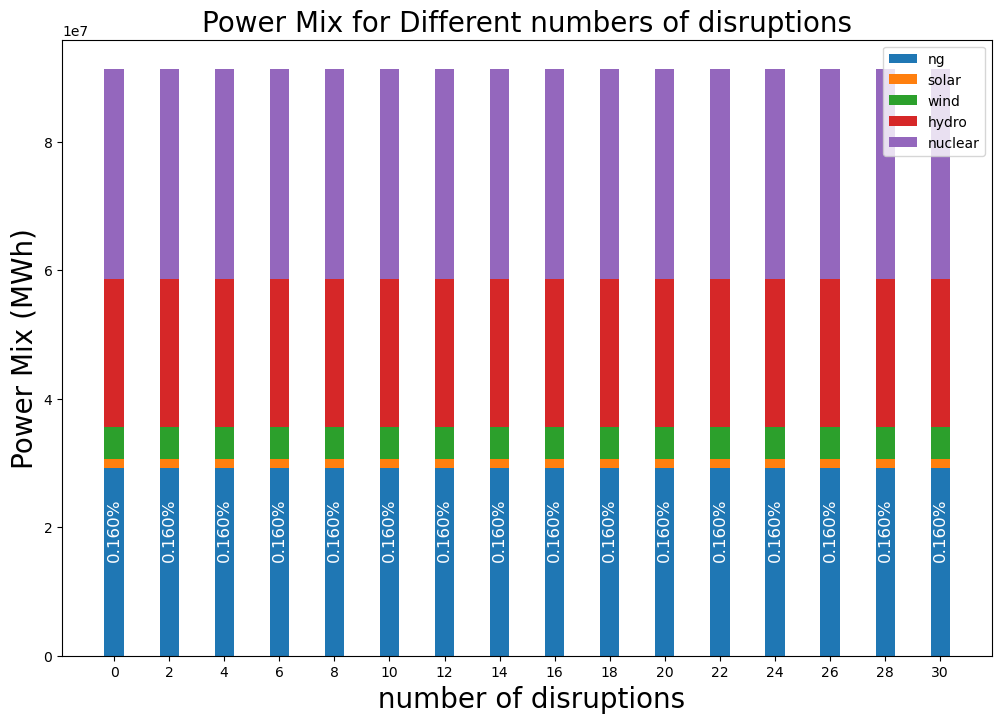

In [96]:
# Define the fields for the power mix
power_fields = ['ng', 'solar', 'wind', 'hydro', 'nuclear']

# Initialize a dictionary to store the aggregated data
power_mix = {field: [] for field in power_fields}

# Aggregate the data for each field
for field in power_fields:
    for i in range(len(DATA[field])):
        power_mix[field].append(np.mean(DATA[field][i]))

# Define the values of n
n_values = np.arange(0, 2 * len(DATA['ng']), 2)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define the width of the bars
bar_width = 0.35

# Define the positions of the bars
bar_positions = np.arange(len(n_values))

# Initialize the bottom position for stacking
bottom = np.zeros(len(n_values))

# Plot each field
for field in power_fields:
    ax.bar(bar_positions, power_mix[field], bar_width, bottom=bottom, label=field)
    bottom += power_mix[field]

for i,n in enumerate(bar_positions):
    y = power_mix['ng'][i]/2
    total = sum([power_mix[field][i] for field in power_fields])
    ax.text(n,y , f'{y/total:.3f}%', ha='center', va='bottom', fontsize=12, rotation=90, color="white")

# Set the x-axis labels and ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(n_values)
ax.set_xlabel(' number of disruptions', fontsize=20)
ax.set_ylabel('Power Mix (MWh)', fontsize=20)
ax.set_title('Power Mix for Different numbers of disruptions', fontsize=20)
ax.legend()

# Display the plot
plt.show()